In [ ]:
import numpy as np

# 1. Create a 5x5 NumPy array initialized with 0s (empty path)
maze = np.zeros((5, 5), dtype=int)

# 2. Define the start and goal positions
start_position = (0, 0)
goal_position = (4, 4)

# 3. Assign distinct values to start and goal cells
maze[start_position] = 2  # 2 for start
maze[goal_position] = 3   # 3 for goal

# 4. Define obstacle coordinates
obstacle_positions = [(1, 2), (2, 2), (3, 1)]

# 5. Assign a distinct value for obstacles
for obs in obstacle_positions:
    maze[obs] = 1  # 1 for obstacle

# 6. Print the maze array
print("Initialized Maze Environment:")
print(maze)

Initialized Maze Environment:
[[2 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 3]]


In [ ]:
import numpy as np

# 1. Define actions
actions = ['up', 'down', 'left', 'right']

# 2. Assign numerical values to actions
action_to_int = {
    'up': 0,
    'down': 1,
    'left': 2,
    'right': 3
}

# 3. Define reward values
reward_goal = 10
reward_obstacle = -10
reward_step = -0.1

# 4. Store these values for later use (already done by assigning to variables)

print("Actions and Rewards Defined:")
print(f"Actions: {actions}")
print(f"Action to Int mapping: {action_to_int}")
print(f"Reward for Goal: {reward_goal}")
print(f"Reward for Obstacle: {reward_obstacle}")
print(f"Reward per Step: {reward_step}")

Actions and Rewards Defined:
Actions: ['up', 'down', 'left', 'right']
Action to Int mapping: {'up': 0, 'down': 1, 'left': 2, 'right': 3}
Reward for Goal: 10
Reward for Obstacle: -10
Reward per Step: -0.1


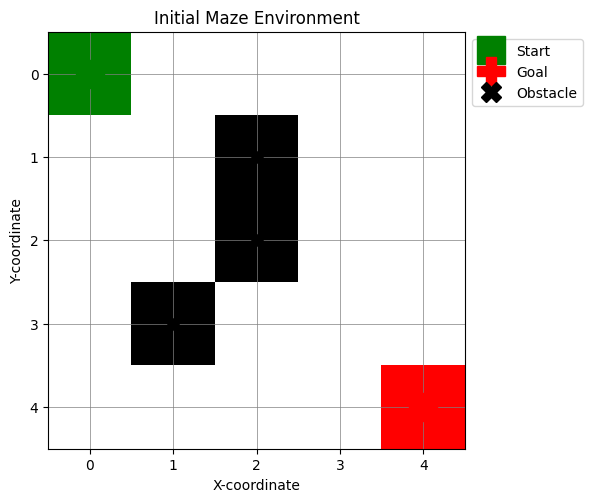

In [ ]:
import matplotlib.pyplot as plt

# 1. Create a figure and an axes object
fig, ax = plt.subplots(figsize=(6, 6)) # Adjust figure size for better visibility

# 2. Display the maze array as an image
# Using 'maze' directly for imshow, where different values represent different elements
# 0: path, 1: obstacle, 2: start, 3: goal
cmap = plt.cm.viridis # Choose a colormap

# Create a custom colormap to clearly distinguish elements
# Define colors for 0 (path), 1 (obstacle), 2 (start), 3 (goal)
colors = ['white', 'black', 'green', 'red']
# Create a custom colormap from these colors
cmap_custom = plt.matplotlib.colors.ListedColormap(colors)
# Define bounds for the colors. This maps values 0 to 0.5 to 'white', 0.5 to 1.5 to 'black', etc.
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
# Normalize the bounds to match the colormap
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap_custom.N)

# Display the maze using the custom colormap and norm
ax.imshow(maze, cmap=cmap_custom, norm=norm, origin='upper', extent=[-0.5, 4.5, 4.5, -0.5])

# 3. Mark the start position (green 'S')
ax.plot(start_position[1], start_position[0], 's', markersize=20, color='green', label='Start')

# 4. Mark the goal position (red 'G')
ax.plot(goal_position[1], goal_position[0], 'P', markersize=20, color='red', label='Goal')

# 5. Iterate through obstacle_positions and mark each obstacle (black 'X')
# To ensure only one legend entry for 'Obstacle', we plot them all at once or handle the label carefully
# Plotting a single point with label and then others without label
ax.plot(obstacle_positions[0][1], obstacle_positions[0][0], 'X', markersize=15, color='black', label='Obstacle')
for i in range(1, len(obstacle_positions)):
    obs = obstacle_positions[i]
    ax.plot(obs[1], obs[0], 'X', markersize=15, color='black')

# 6. Set the x and y axis ticks to correspond to the maze grid
ax.set_xticks(np.arange(maze.shape[1]))
ax.set_yticks(np.arange(maze.shape[0]))
ax.set_xticklabels(np.arange(maze.shape[1]))
ax.set_yticklabels(np.arange(maze.shape[0]))
ax.grid(True, color='gray', linestyle='-', linewidth=0.5)

# Set labels for clarity
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')

# 7. Add a title to the plot
ax.set_title('Initial Maze Environment')

# 8. Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure layout is tight to prevent legend overlap
plt.tight_layout()

# 9. Display the plot
plt.show()

In [ ]:
import numpy as np

# 1. Determine the total number of states in the maze (5x5 = 25 states)
num_states = maze.shape[0] * maze.shape[1]

# 2. Determine the total number of possible actions
# The 'actions' list was defined previously: ['up', 'down', 'left', 'right']
num_actions = len(actions)

# 3. Create a NumPy array called q_table with dimensions (num_states, num_actions)
# Initialize all values in this table to zeros.
q_table = np.zeros((num_states, num_actions))

# 4. Print the shape of the initialized q_table to verify its dimensions.
print("Initialized Q-table shape:", q_table.shape)

Initialized Q-table shape: (25, 4)


In [ ]:
import random

# 1. Define helper function: state_to_index
def state_to_index(row, col):
    """Converts (row, col) coordinates to a single integer index."""
    # 'maze' variable is already available from previous steps
    num_cols = maze.shape[1]
    return row * num_cols + col

# 2. Define helper function: index_to_state
def index_to_state(index):
    """Converts a single integer index to (row, col) coordinates."""
    num_cols = maze.shape[1]
    row = index // num_cols
    col = index % num_cols
    return row, col

# 3. Define function: get_next_state_and_reward
def get_next_state_and_reward(current_row, current_col, action_int):
    """Calculates the next state and reward based on the current state and action."""
    next_row, next_col = current_row, current_col
    reward = reward_step # Default reward for taking a step

    # Determine intended next position
    if actions[action_int] == 'up':
        next_row = max(0, current_row - 1)
    elif actions[action_int] == 'down':
        next_row = min(maze.shape[0] - 1, current_row + 1)
    elif actions[action_int] == 'left':
        next_col = max(0, current_col - 1)
    elif actions[action_int] == 'right':
        next_col = min(maze.shape[1] - 1, current_col + 1)

    # Handle boundary conditions (if next_row/col is same as current_row/col, agent didn't move effectively)
    # The max/min functions above already ensure agent stays within bounds.
    # If the calculated next_row/col is an obstacle or stays at current position because of a boundary, it should be handled.

    # Check for obstacles at the *intended* next position before updating current position
    if maze[next_row, next_col] == 1:  # 1 for obstacle
        # If it's an obstacle, agent stays in current position and gets obstacle penalty
        next_row, next_col = current_row, current_col
        reward = reward_obstacle
    elif maze[next_row, next_col] == 3: # 3 for goal
        reward = reward_goal

    return next_row, next_col, reward

# 4. Define epsilon_greedy_policy function
def epsilon_greedy_policy(q_table, state_index, epsilon):
    """Selects an action using an epsilon-greedy policy."""
    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return random.randint(0, num_actions - 1)
    else:
        # Exploit: choose the action with the highest Q-value
        return np.argmax(q_table[state_index, :])

print("Helper functions (state_to_index, index_to_state, get_next_state_and_reward) and epsilon_greedy_policy defined.")

Helper functions (state_to_index, index_to_state, get_next_state_and_reward) and epsilon_greedy_policy defined.


In [ ]:
import numpy as np

# 1. Define Q-learning parameters
learning_rate = 0.1  # Alpha (α)
discount_factor = 0.9  # Gamma (γ)
epsilon = 1.0        # Epsilon (ε) for exploration-exploitation balance
epsilon_decay_rate = 0.001
min_epsilon = 0.01
num_episodes = 1000  # Number of training episodes
max_steps_per_episode = 100 # Maximum steps per episode to prevent infinite loops

# Store metrics
rewards_per_episode = []

print("Starting Q-learning training...")

# 2. Q-learning training loop
for episode in range(num_episodes):
    # Reset environment for new episode
    current_row, current_col = start_position
    current_state_index = state_to_index(current_row, current_col)
    episode_reward = 0
    done = False
    steps = 0

    while not done and steps < max_steps_per_episode:
        # Choose action using epsilon-greedy policy
        action = epsilon_greedy_policy(q_table, current_state_index, epsilon)

        # Get next state and reward
        next_row, next_col, reward = get_next_state_and_reward(current_row, current_col, action)
        next_state_index = state_to_index(next_row, next_col)

        # Update Q-value using the Bellman equation
        # Q(s,a) = Q(s,a) + α * [R(s,a) + γ * max(Q(s',a')) - Q(s,a)]
        old_q_value = q_table[current_state_index, action]
        next_max_q_value = np.max(q_table[next_state_index, :])

        new_q_value = old_q_value + learning_rate * (reward + discount_factor * next_max_q_value - old_q_value)
        q_table[current_state_index, action] = new_q_value

        # Update current state
        current_row, current_col = next_row, next_col
        current_state_index = next_state_index
        episode_reward += reward
        steps += 1

        # Check if goal is reached or obstacle hit (and agent stayed in place)
        if maze[current_row, current_col] == 3: # Goal
            done = True
        # If current_row, current_col is an obstacle, it means the agent tried to move into it and stayed put.
        # This is already handled by get_next_state_and_reward making it stay, and giving -10 reward.
        # The loop will continue, but the reward will be very negative, encouraging not to go there.
        # For simplicity, we can also consider an obstacle hit as an 'end' for the episode here,
        # or just let the reward guide the agent away. Let's let the reward guide it.

    rewards_per_episode.append(episode_reward)

    # Epsilon decay
    epsilon = max(min_epsilon, epsilon - epsilon_decay_rate)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes} - Total Reward: {episode_reward:.2f} - Epsilon: {epsilon:.4f}")

print("Q-learning training finished.")
print("First 10 Q-table entries (first state, first 10 actions if num_actions > 10):\n", q_table[0, :min(num_actions, 10)])


Starting Q-learning training...
Episode 100/1000 - Total Reward: -137.90 - Epsilon: 0.9000
Episode 200/1000 - Total Reward: -78.30 - Epsilon: 0.8000
Episode 300/1000 - Total Reward: -12.70 - Epsilon: 0.7000
Episode 400/1000 - Total Reward: 7.80 - Epsilon: 0.6000
Episode 500/1000 - Total Reward: -1.30 - Epsilon: 0.5000
Episode 600/1000 - Total Reward: 9.30 - Epsilon: 0.4000
Episode 700/1000 - Total Reward: 8.70 - Epsilon: 0.3000
Episode 800/1000 - Total Reward: 9.30 - Epsilon: 0.2000
Episode 900/1000 - Total Reward: 9.30 - Epsilon: 0.1000
Episode 1000/1000 - Total Reward: 9.30 - Epsilon: 0.0100
Q-learning training finished.
First 10 Q-table entries (first state, first 10 actions if num_actions > 10):
 [3.73513917 4.2612659  3.73513916 4.26045518]


Optimal path found in 8 steps.


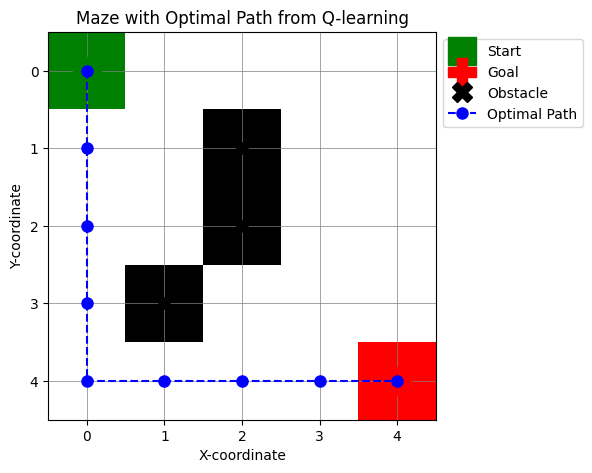

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Re-display the initial maze environment plot (reusing previous plotting code)
fig, ax = plt.subplots(figsize=(6, 6))

colors = ['white', 'black', 'green', 'red']
cmap_custom = plt.matplotlib.colors.ListedColormap(colors)
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap_custom.N)

ax.imshow(maze, cmap=cmap_custom, norm=norm, origin='upper', extent=[-0.5, 4.5, 4.5, -0.5])

# Mark start, goal, and obstacles
ax.plot(start_position[1], start_position[0], 's', markersize=20, color='green', label='Start')
ax.plot(goal_position[1], goal_position[0], 'P', markersize=20, color='red', label='Goal')

ax.plot(obstacle_positions[0][1], obstacle_positions[0][0], 'X', markersize=15, color='black', label='Obstacle')
for i in range(1, len(obstacle_positions)):
    obs = obstacle_positions[i]
    ax.plot(obs[1], obs[0], 'X', markersize=15, color='black')

ax.set_xticks(np.arange(maze.shape[1]))
ax.set_yticks(np.arange(maze.shape[0]))
ax.set_xticklabels(np.arange(maze.shape[1]))
ax.set_yticklabels(np.arange(maze.shape[0]))
ax.grid(True, color='gray', linestyle='-', linewidth=0.5)
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')

# 2. Initialize current_row and current_col to start_position
current_row, current_col = start_position

# 3. Create an empty list to store the optimal path
optimal_path = []

# 4. Add the start_position to optimal_path
optimal_path.append(start_position)

# 5. Loop to find the optimal path
path_found = False
steps_taken = 0
while not path_found and steps_taken < max_steps_per_episode:
    # a. Convert current_row, current_col into current_state_index
    current_state_index = state_to_index(current_row, current_col)

    # b. Determine the best action for the current_state_index
    best_action_int = np.argmax(q_table[current_state_index, :])

    # c. Get the next_row and next_col by applying the best_action_int
    # The reward is not needed for path visualization
    next_row, next_col, _ = get_next_state_and_reward(current_row, current_col, best_action_int)

    # d. Update current_row and current_col
    current_row, current_col = next_row, next_col

    # e. Add the new (current_row, current_col) to the optimal_path list
    optimal_path.append((current_row, current_col))

    # f. If (current_row, current_col) is equal to goal_position, break the loop
    if (current_row, current_col) == goal_position:
        path_found = True

    steps_taken += 1

print(f"Optimal path found in {steps_taken} steps.")

# 6. Extract row and column coordinates from optimal_path
path_rows = [p[0] for p in optimal_path]
path_cols = [p[1] for p in optimal_path]

# 7. Plot the optimal_path on the existing maze visualization
ax.plot(path_cols, path_rows, color='blue', linestyle='--', marker='o', markersize=8, label='Optimal Path')

# 8. Add a title to the plot
ax.set_title('Maze with Optimal Path from Q-learning')

# 9. Update the legend to include the 'Optimal Path' entry
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure layout is tight to prevent legend overlap
plt.tight_layout()

# 10. Display the plot
plt.show()

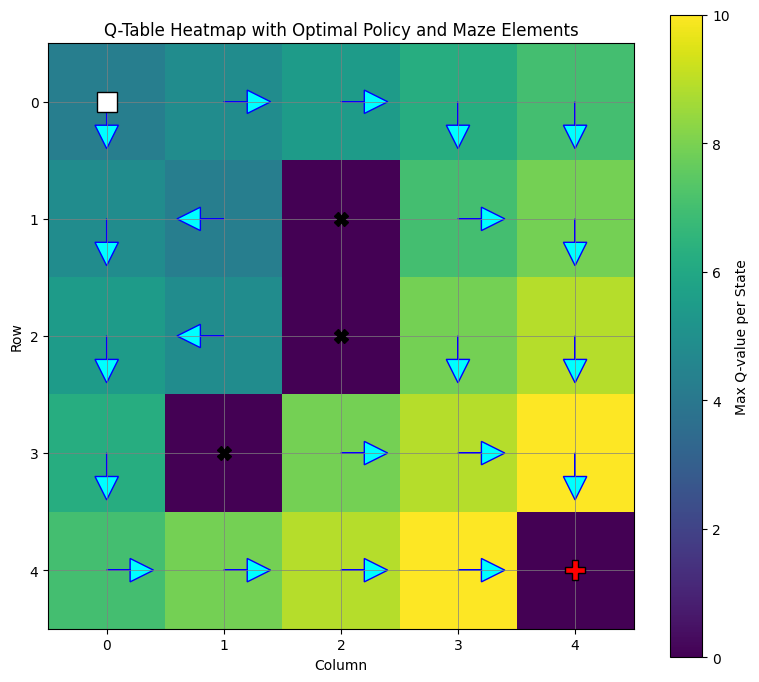

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 7)) # Adjusted figure size for better readability and colorbar

# 2. Calculate the maximum Q-value for each state
num_rows, num_cols = maze.shape
q_table_reshaped = q_table.reshape(num_rows, num_cols, num_actions)
max_q_values = np.max(q_table_reshaped, axis=2)

# 3. Display the max_q_values as a heatmap
# Use 'imshow' to display the heatmap, 'viridis' colormap is good for continuous values
# Interpolation='nearest' for blocky cells, extent to align with grid
img = ax.imshow(max_q_values, cmap='viridis', origin='upper', extent=[-0.5, num_cols-0.5, num_rows-0.5, -0.5])

# 4. Overlay the original maze elements
# Mark start, goal, and obstacles on top of the heatmap
ax.plot(start_position[1], start_position[0], 's', markersize=15, color='white', markeredgecolor='black', label='Start')
ax.plot(goal_position[1], goal_position[0], 'P', markersize=15, color='red', markeredgecolor='black', label='Goal')

# Plot obstacles
for obs in obstacle_positions:
    ax.plot(obs[1], obs[0], 'X', markersize=10, color='black', label='Obstacle' if obs == obstacle_positions[0] else "")

# 5. Iterate through each cell and draw arrows for optimal actions
for r in range(num_rows):
    for c in range(num_cols):
        state_idx = state_to_index(r, c)
        # Skip drawing arrows on obstacles or goal, or if Q-values are all zero
        if maze[r, c] == 1: # Obstacle
            continue
        if maze[r, c] == 3: # Goal
            continue
        if np.all(q_table[state_idx, :] == 0): # State with no learned Q-values
            continue

        best_action_int = np.argmax(q_table[state_idx, :])

        dx, dy = 0, 0
        if actions[best_action_int] == 'up':
            dy = -0.4
        elif actions[best_action_int] == 'down':
            dy = 0.4
        elif actions[best_action_int] == 'left':
            dx = -0.4
        elif actions[best_action_int] == 'right':
            dx = 0.4

        # Add a small offset to center the arrows within the grid cell
        ax.arrow(c, r, dx, dy, head_width=0.2, head_length=0.2, fc='cyan', ec='blue', length_includes_head=True)

# 6. Set the x and y axis ticks and labels, and add a grid
ax.set_xticks(np.arange(num_cols))
ax.set_yticks(np.arange(num_rows))
ax.set_xticklabels(np.arange(num_cols))
ax.set_yticklabels(np.arange(num_rows))
ax.grid(True, color='gray', linestyle='-', linewidth=0.5)
ax.set_xlabel('Column')
ax.set_ylabel('Row')

# 7. Add a title to the plot
ax.set_title('Q-Table Heatmap with Optimal Policy and Maze Elements')

# 8. Add a colorbar
fig.colorbar(img, ax=ax, orientation='vertical', label='Max Q-value per State')

# 9. Display the plot
plt.tight_layout() # Adjust layout to prevent labels/colorbar from overlapping
plt.show()


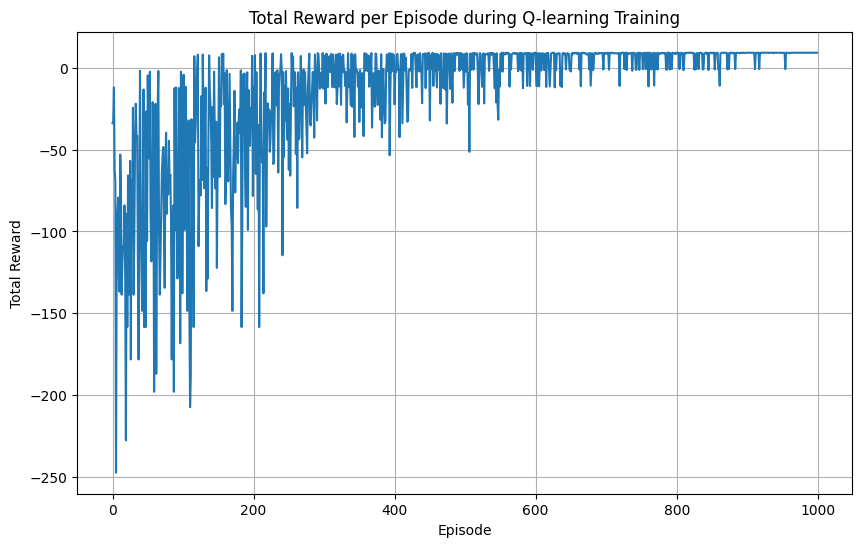

Average reward over all episodes: -13.95
Max reward: 9.30
Min reward: -247.60


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Plot the rewards_per_episode
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode during Q-learning Training')
plt.grid(True)
plt.show()

# 2. Optionally, calculate and print some statistics about the rewards
print(f"Average reward over all episodes: {np.mean(rewards_per_episode):.2f}")
print(f"Max reward: {np.max(rewards_per_episode):.2f}")
print(f"Min reward: {np.min(rewards_per_episode):.2f}")
